In [21]:
import re
from copy import copy
import string

In [22]:
def clean_line(line):
    new_line = copy(line)
    new_line = re.sub(r"\n", "", new_line)
    new_line = re.sub(r"^\d+:\d+\s", "", new_line)
    new_line = new_line.translate(str.maketrans('', '', string.punctuation))
    if new_line == "":
        return None
    return new_line.lower()

def make_token_list(line_list):
    all_tokens = list(map(lambda x: x.split(), line_list))
    return [token for line in all_tokens for token in line]

In [23]:
# open and clean

with open("./Files/seed_text0", "r") as f:
    lines = f.readlines()
    book1 = []
    book2 = []
    seed = 0
    for line in lines:
        if line == "Paradise Lost\n":
            seed = 1
        if not seed:
            line = clean_line(line)
            if line:
                # print([line])
                # break
                book1.append(line)
        else:
            book2.append(line)

book1 = make_token_list(book1)

In [24]:
def update_corpus(word, running_corpus=None):
    if not running_corpus:
        running_corpus = {}
    value = running_corpus.get(word)
    if not value:
        running_corpus[word] = 1
    else:
        running_corpus[word] += 1
    return running_corpus


corpus = {}
for token in book1:
    corpus = update_corpus(token, corpus)



In [25]:
list(corpus.items())[:2]

[('the', 64020), ('bible', 2)]

In [26]:
import pandas as pd

corpus_series = pd.Series(corpus)
frame = {
    "word": corpus_series.index.values,
    "frequency": corpus_series.values
}
corpus_df = pd.DataFrame(frame).sort_values("frequency", ascending=False).iloc[:5000]
corpus_df.head()

,word,frequency
0,the,64020
7,and,51696
16,of,34667
77,to,13580
27,that,12912


In [27]:
import seaborn as sns

<AxesSubplot:xlabel='word', ylabel='frequency'>

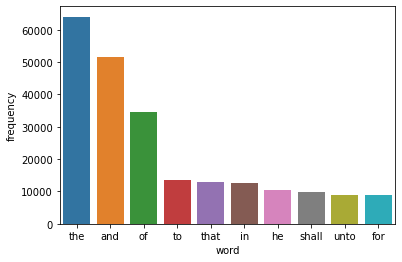

In [28]:
sns.barplot(x="word", y="frequency", data=corpus_df.iloc[:10])

In [29]:
corpus_df.to_csv("./Files/text_as_tokens_with_freqs.csv", index=False)